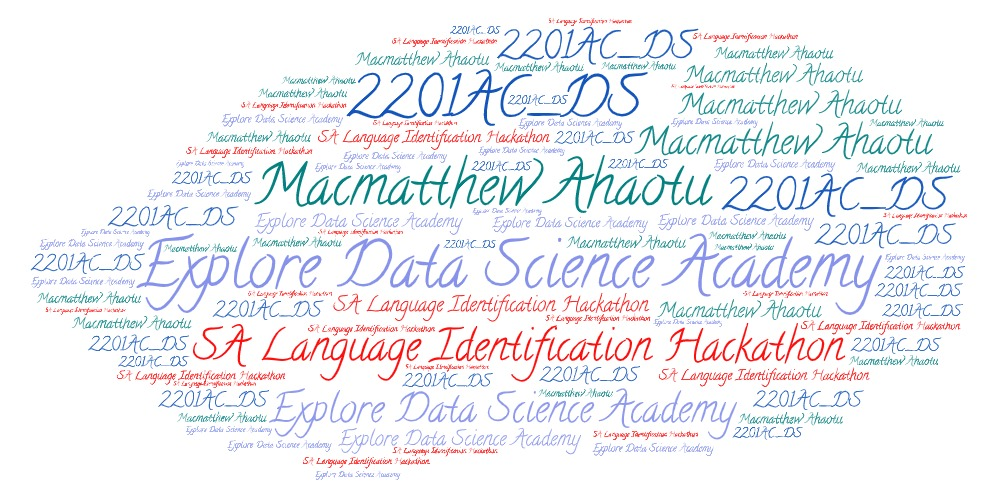

# EXPLORE Data Science Academy Classification Hackathon

## Overview
South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.

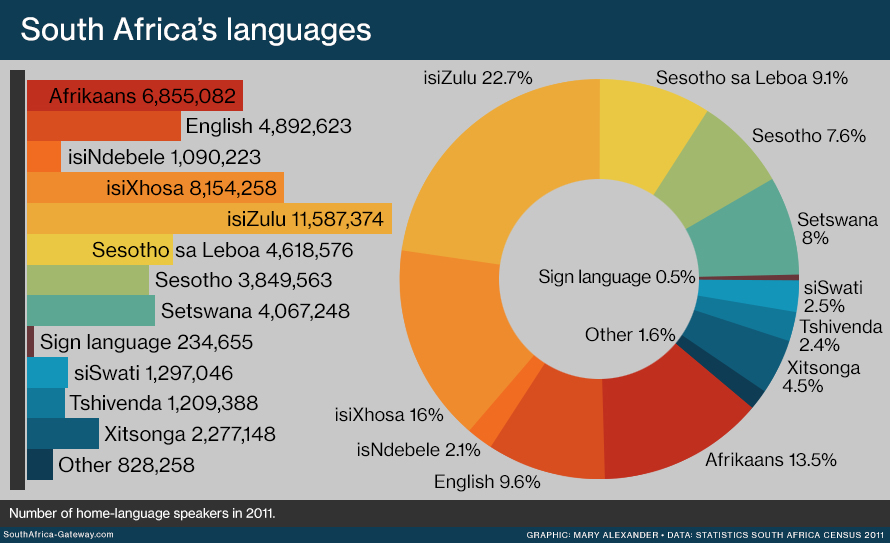

With such a multilingual population, it is only obvious that our systems and devices also communicate in multi-languages.

In this challenge, you will take text which is in any of South Africa's 11 Official languages and identify which language the text is in. This is an example of NLP's Language Identification, the task of determining the natural language that a piece of text is written in.

---
---
<a id="cont"></a>

## Table of Contents
---
---


<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Pre-Processing</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Evaluation</a>

<a href=#seven>7. Conclusions</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---


In [1]:
# Importing modules for data science and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 180 # Quality of all figures in notebook

# NLP Libraries
import re
import string
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
import string
from nltk.stem import WordNetLemmatizer


# ML Libraries
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, cross_validate
from sklearn import metrics
from sklearn.svm import LinearSVC, SVC
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report, confusion_matrix




#ignore warnings
import warnings
warnings.filterwarnings('ignore')

<a id="two"></a>
## 2. Loading the Data
<a href=#cont>Back to Table of Contents</a>


---
 

In [2]:
# Load training data
df= pd.read_csv('train_set.csv')

# Load testing data 
test = pd.read_csv('test_set.csv')

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a href=#cont>Back to Table of Contents</a>

---

Exploratory Data Analysis (EDA) refers to the critical process of performing initial investigations 
on data so as to discover patterns,to spot anomalies,to test hypothesis 
and to check assumptions with the help of summary statistics and graphical representations.

### EDA can be conducted in the following ways:

Univariate:-
- i. non-graphical:- This is simplest form of data analysis, where the data being analyzed consists of just one variable. Since it’s a single variable, it doesn’t deal with causes or relationships.
- ii. graphical:- Non-graphical methods don’t provide a full picture of the data. Graphical methods are therefore required. It involves visual exploratory analysis of the data.

Multivariate:-
- i. non-graphical:- Multivariate non-graphical EDA techniques generally show the relationship between two or more variables of the data through cross-tabulation or statistics.
- ii. graphical:- Multivariate data uses graphics to display relationships between two or more sets of data. The most used graphic is a grouped bar plot or bar chart with each group representing one level of one of the variables and each bar within a group representing the levels of the other variable.

### Basic Analysis

This Analysis gives us detailed insight on our dataset which includes a review of the dataset, the dimensionality of the data, the measure of dipersion if present, the uniqueness of each variables, and also the percentage of duplicates in the dataset

In [3]:
df.head() # train_dataset preview

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [4]:
test.head() #Test_dataset preview

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


In [5]:
# checking the dimension of the dataset
print(df.shape)
print(test.shape)

(33000, 2)
(5682, 2)


In [6]:
df.dtypes # checking datatypes 

lang_id    object
text       object
dtype: object

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB
None


In [8]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   5682 non-null   int64 
 1   text    5682 non-null   object
dtypes: int64(1), object(1)
memory usage: 88.9+ KB
None


In [9]:
df.describe()

,lang_id,text
count,33000,33000
unique,11,29948
top,xho,ngokwesekhtjheni yomthetho ophathelene nalokhu...
freq,3000,17


In [10]:
df['lang_id'].value_counts() # checking for unique value count for the target variable

xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

In [11]:
# Looking for duplicates
percent_duplicates = round((1-(df['text'].nunique()/len(df['text'])))*100,2)
print(percent_duplicates,'%')

9.25 %


From the Various analysis done othe dataset above a better understanding about the data has been acquired. W can therefore draw the following concusions on the dataset
- There are 33000 rows and 2 columns for the train set
- The dataset set has one independent variable('text') and one response variable('lang_id') which are both categorical datatypes
- There are no missing values
- There are 11 unique languages present and the dataset is suprisingly distributed evenly among them (3000 each)
- About 9.25%(3052) of the data are duplicates which has only a minor effect on the remainin 90.75%

### Graphical Univariate Analysis

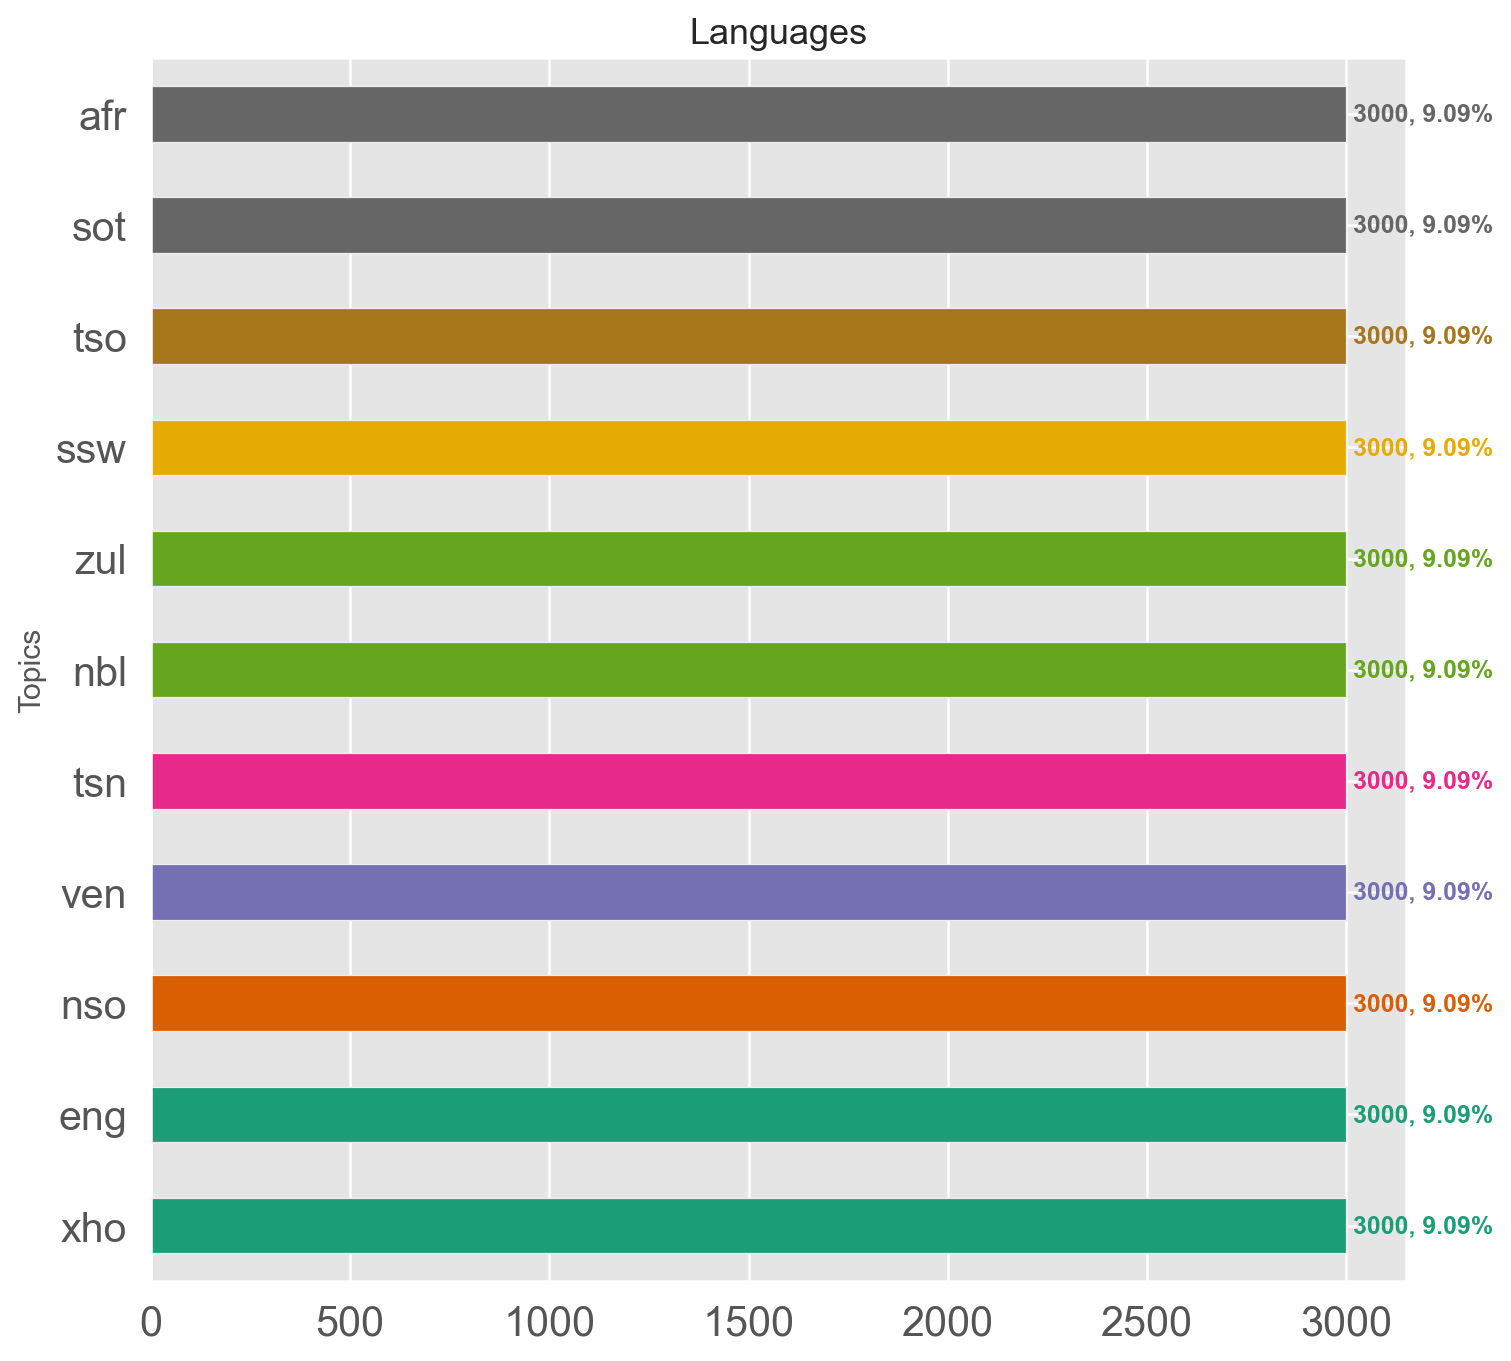

In [21]:
plt.style.use('ggplot')


num_classes = len(df["lang_id"].value_counts())

colors = plt.cm.Dark2(np.linspace(0, 1, num_classes))
iter_color = iter(colors)

df['lang_id'].value_counts().plot.barh(title="Languages", 
                                                 ylabel="Topics",
                                                 color=colors,
                                                 figsize=(9,9))

for i, v in enumerate(df['lang_id'].value_counts()):
  c = next(iter_color)
  plt.text(v, i,
           " "+str(v)+", "+str(round(v*100/df.shape[0],2))+"%", 
           color=c, 
           va='center', 
           fontweight='bold')

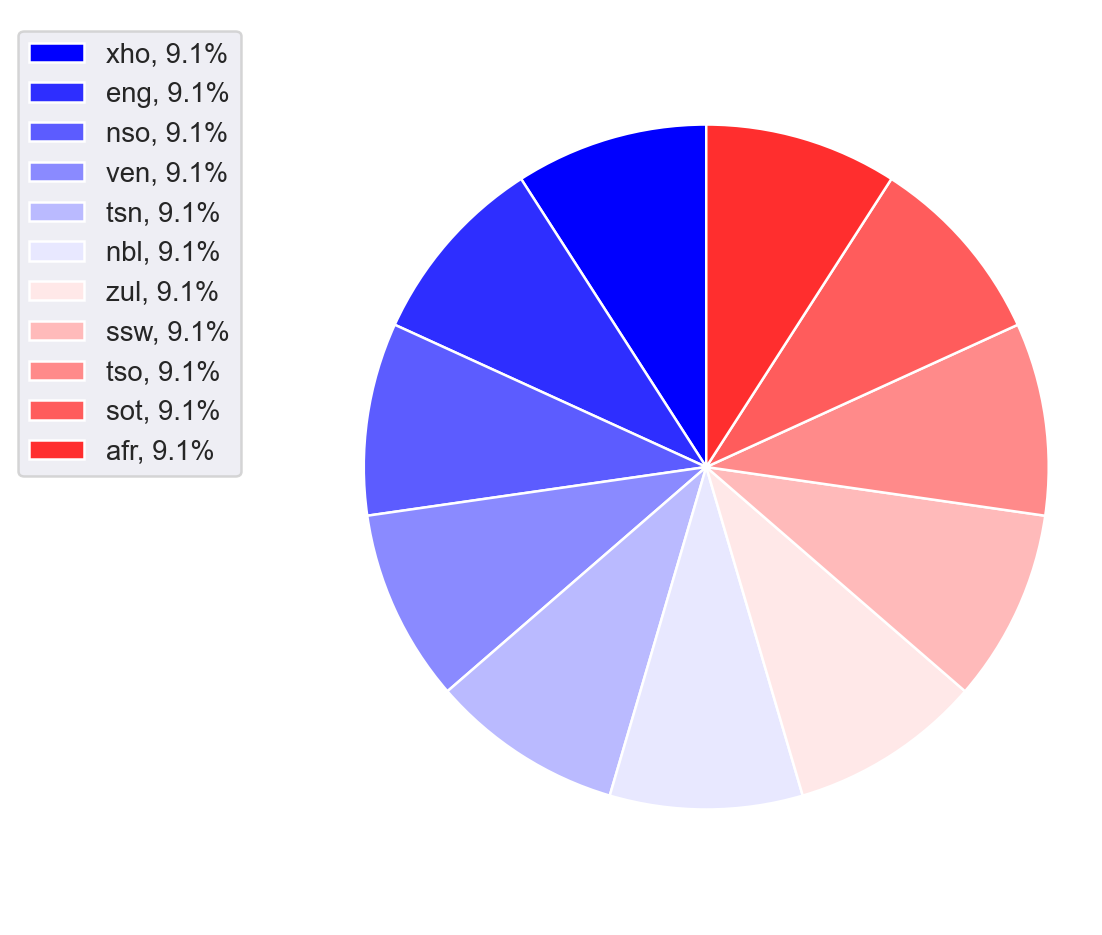

In [14]:
df_copy = df.copy()


# Checking the numerical distribution using a Pie Chart
lang_ids = df_copy['lang_id'].value_counts()/df_copy.shape[0]
labels = (df_copy['lang_id'].value_counts()/df_copy.shape[0]).index
fig1, ax1 = plt.subplots(figsize=(6, 5))
fig1.subplots_adjust(0.3,0,1,1)


theme = plt.get_cmap('bwr')
ax1.set_prop_cycle("color", [theme(1. * i / len(lang_ids)) for i in range(len(lang_ids))])

_, _ = ax1.pie(lang_ids, startangle=90)

ax1.axis('equal')

total = sum(lang_ids)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, lang_ids)],
    prop={'size': 11},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)

plt.show()

The above visuals shows what was discovered during the basic analysis, that the dataset is evenly distributed

<a id="four"></a>
## 4. Data Preprocessing
<a href=#cont>Back to Table of Contents</a>

Before we continue exploring our data we will have to do some preprocessing in order to gain maximum insights:

- Removal of 'noisy entities' such as punctuations, and extra white space.
- Tokenization
- converting all words into lowercases

In [16]:
def clean(text):
    
    """Converts apostrophe suffixes to words, replace webpage links with url, 
    annotate hashtags and mentions, remove a selection of punctuation, and convert all words to lower case.
    Args:
        df (DataFrame): dataframe containing 'text' column to convert
    Returns:
        df (DataFrame): dataframe with converted 'text' column 
    """
    lemmatizer = WordNetLemmatizer()
    def word_lemma(words, lemmatizer):
        lemma = [lemmatizer.lemmatize(word) for word in words]
        return ''.join([l for l in lemma])
    import string
    def remove_extras(post):
        punc_numbers = string.punctuation + '0123456789'
        return ''.join([l for l in post if l not in punc_numbers])
    #Lower case
    text = text.lower()
    #Removal of Punctuation
    text = remove_extras(text)
    text = word_lemma(text, lemmatizer)
    return text

In [17]:
df['cleaned'] = df['text'].apply(clean) # applying the preprocessing function on the dataset

In [18]:
df

,lang_id,text,cleaned
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,idha iya kuba nobulumko bokubeka umsebenzi nap...
2,eng,the province of kwazulu-natal department of tr...,the province of kwazulunatal department of tra...
3,nso,o netefatša gore o ba file dilo ka moka tše le...,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...
...,...,...,...
32995,tsn,popo ya dipolateforomo tse ke go tlisa boetele...,popo ya dipolateforomo tse ke go tlisa boetele...
32996,sot,modise mosadi na o ntse o sa utlwe hore thaban...,modise mosadi na o ntse o sa utlwe hore thaban...
32997,eng,closing date for the submission of completed t...,closing date for the submission of completed t...
32998,xho,nawuphina umntu ofunyenwe enetyala phantsi kwa...,nawuphina umntu ofunyenwe enetyala phantsi kwa...


<a id="nine"></a>
## 5. Modeling
<a href=#cont>Back to Table of Contents</a>

We will be making use of a pipeline to build our classification models. This pipeline will vectorize the text data before fitting it to our chosen model.

The following models will be considered:

- Random forest
- Naive Bayes
- K nearest neighbors
- Logistic regression
- Support vector machine (SVM OR SVC)
- Linear SVC
- SGD Classifier

### Train - Validation split

Before we pass our data through our custom pipelines we have to split our train data into features and target variables. After this step we can split our train data into a train and validation set. This will allow us to evaluate our model performance and chose the best model to use for our submission

In [19]:
# Seperate features and target variables
X = df['cleaned'] # independent variable
y = df['lang_id'] # response variable
# Create train and validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=52)

### Pipelines

Pipelines consist of 2 steps, vectorization and model fitting.

Machines, unlike humans, cannot understand the raw text. Machines can only see numbers. Particularly, statistical techniques such as machine learning can only deal with numbers. Therefore, we need to convert our text into numbers.

The TFIDF or Count vectorizer assigns word frequency scores that try to highlight words that are more interesting, e.g. frequent in a document but not across documents. The TfidfVectorizer will tokenize documents, learn the vocabulary and inverse document frequency weightings, and allow you to encode new documents. Another advantage of this method is that the resulting vectors are already scaled.

In [46]:
def model(models, X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
    '''
    Lightweight script to test many models
    Args:
    :param models: model used
    :param X_train: training split
    :param y_train: training target vector
    :param X_test: test split
    :param y_test: test target vector
    Returns:
        DataFrame of predictions
    '''
    
    dfs = []
    results = []
    names = []
    labels = (df['lang_id'].value_counts()/df.shape[0]).index
    target_names = [x for x in labels]
    for name, model in models:
        kfold = KFold(n_splits=5, shuffle=True, random_state=42) # splitting the data into kfolds
        cv_results = cross_validate(model, X_train, y_train, cv=kfold)
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(name)
        print(classification_report(y_test, y_pred, target_names=target_names))
        print(f1_score(y_test, y_pred, average= 'weighted'))
        results.append(cv_results)
        names.append(name)
        this_df = pd.DataFrame(cv_results)
        this_df['model'] = name
        dfs.append(this_df)
    final = pd.concat(dfs, ignore_index=True)
    return final

In [47]:
LR = Pipeline([('Count',CountVectorizer(ngram_range = (5, 5), analyzer = 'char')),('classify', LogisticRegression())])
RF= Pipeline([('Count',CountVectorizer(ngram_range = (5, 5), analyzer = 'char')),('classify', RandomForestClassifier())])
KNN = Pipeline([('Count',CountVectorizer(ngram_range = (5, 5), analyzer = 'char')),('classify', KNeighborsClassifier())])
MULT = Pipeline([('Count',CountVectorizer(ngram_range = (5, 5), analyzer = 'char')),('classify',MultinomialNB())])
LSVM = Pipeline([('Count',CountVectorizer(ngram_range = (5, 5), analyzer = 'char')),('classify', LinearSVC())])
SGD = Pipeline([('Count',CountVectorizer(ngram_range = (5, 5), analyzer = 'char')),('classify', SGDClassifier())])

In [48]:
# base model using count vectorizer 
model_base = [
        ('LogReg', LR), 
        ('RF', RF),
        ('KNN', KNN),
        ('MULT', MULT),
        ('LINSVM', LSVM),
        ('SGD', SGD)                   
        ]

In [49]:
modelled = model(model_base, X_train, y_train, X_test, y_test)

LogReg
              precision    recall  f1-score   support

         xho       1.00      1.00      1.00       754
         eng       1.00      1.00      1.00       762
         nso       1.00      1.00      1.00       734
         ven       1.00      1.00      1.00       782
         tsn       1.00      1.00      1.00       759
         nbl       1.00      1.00      1.00       732
         zul       1.00      1.00      1.00       746
         ssw       1.00      1.00      1.00       700
         tso       1.00      1.00      1.00       785
         sot       1.00      1.00      1.00       761
         afr       1.00      1.00      1.00       735

    accuracy                           1.00      8250
   macro avg       1.00      1.00      1.00      8250
weighted avg       1.00      1.00      1.00      8250

0.9987880474489798
RF
              precision    recall  f1-score   support

         xho       1.00      1.00      1.00       754
         eng       0.99      1.00      1.00      

<a id="six"></a>
## 6. Model Evaluation
<a href=#cont>Back to Table of Contents</a>

To wrap up our analysis, we are going to analyze the data in the final dataframe returned from the model() script.

To obtain better estimates of the distribution of metrics from each model before and after hyper-parameter tuning, we ran an empirical bootstrapping at 30 samples. Additionally, we partitioned the data into two sorts: performance metrics and fit-time metrics. The following block of code achieves this.

In [50]:
def mod_perf(modelled):
    '''
    This script was constructed to avoid repetitive codes for performance analysis.
    Args:
        params modelled: results after using the model() script
    Returns : 
        a tuple contain the test score, fit time, and score time of each model
    
    '''
    bootstraps = []
    for model in list(set(modelled.model.values)):
        model_df = modelled.loc[modelled.model == model]
        bootstrap = model_df.sample(n=30, replace=True)
        bootstraps.append(bootstrap)
        
    bootstrap_df = pd.concat(bootstraps, ignore_index=True)
    results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
    time_metrics = ['fit_time','score_time'] # fit time metrics
    ## PERFORMANCE METRICS
    results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
    results_long_nofit = results_long_nofit.sort_values(by='values')
    ## TIME METRICS
    results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
    results_long_fit = results_long_fit.sort_values(by='values')
    return (results_long_nofit,results_long_fit)

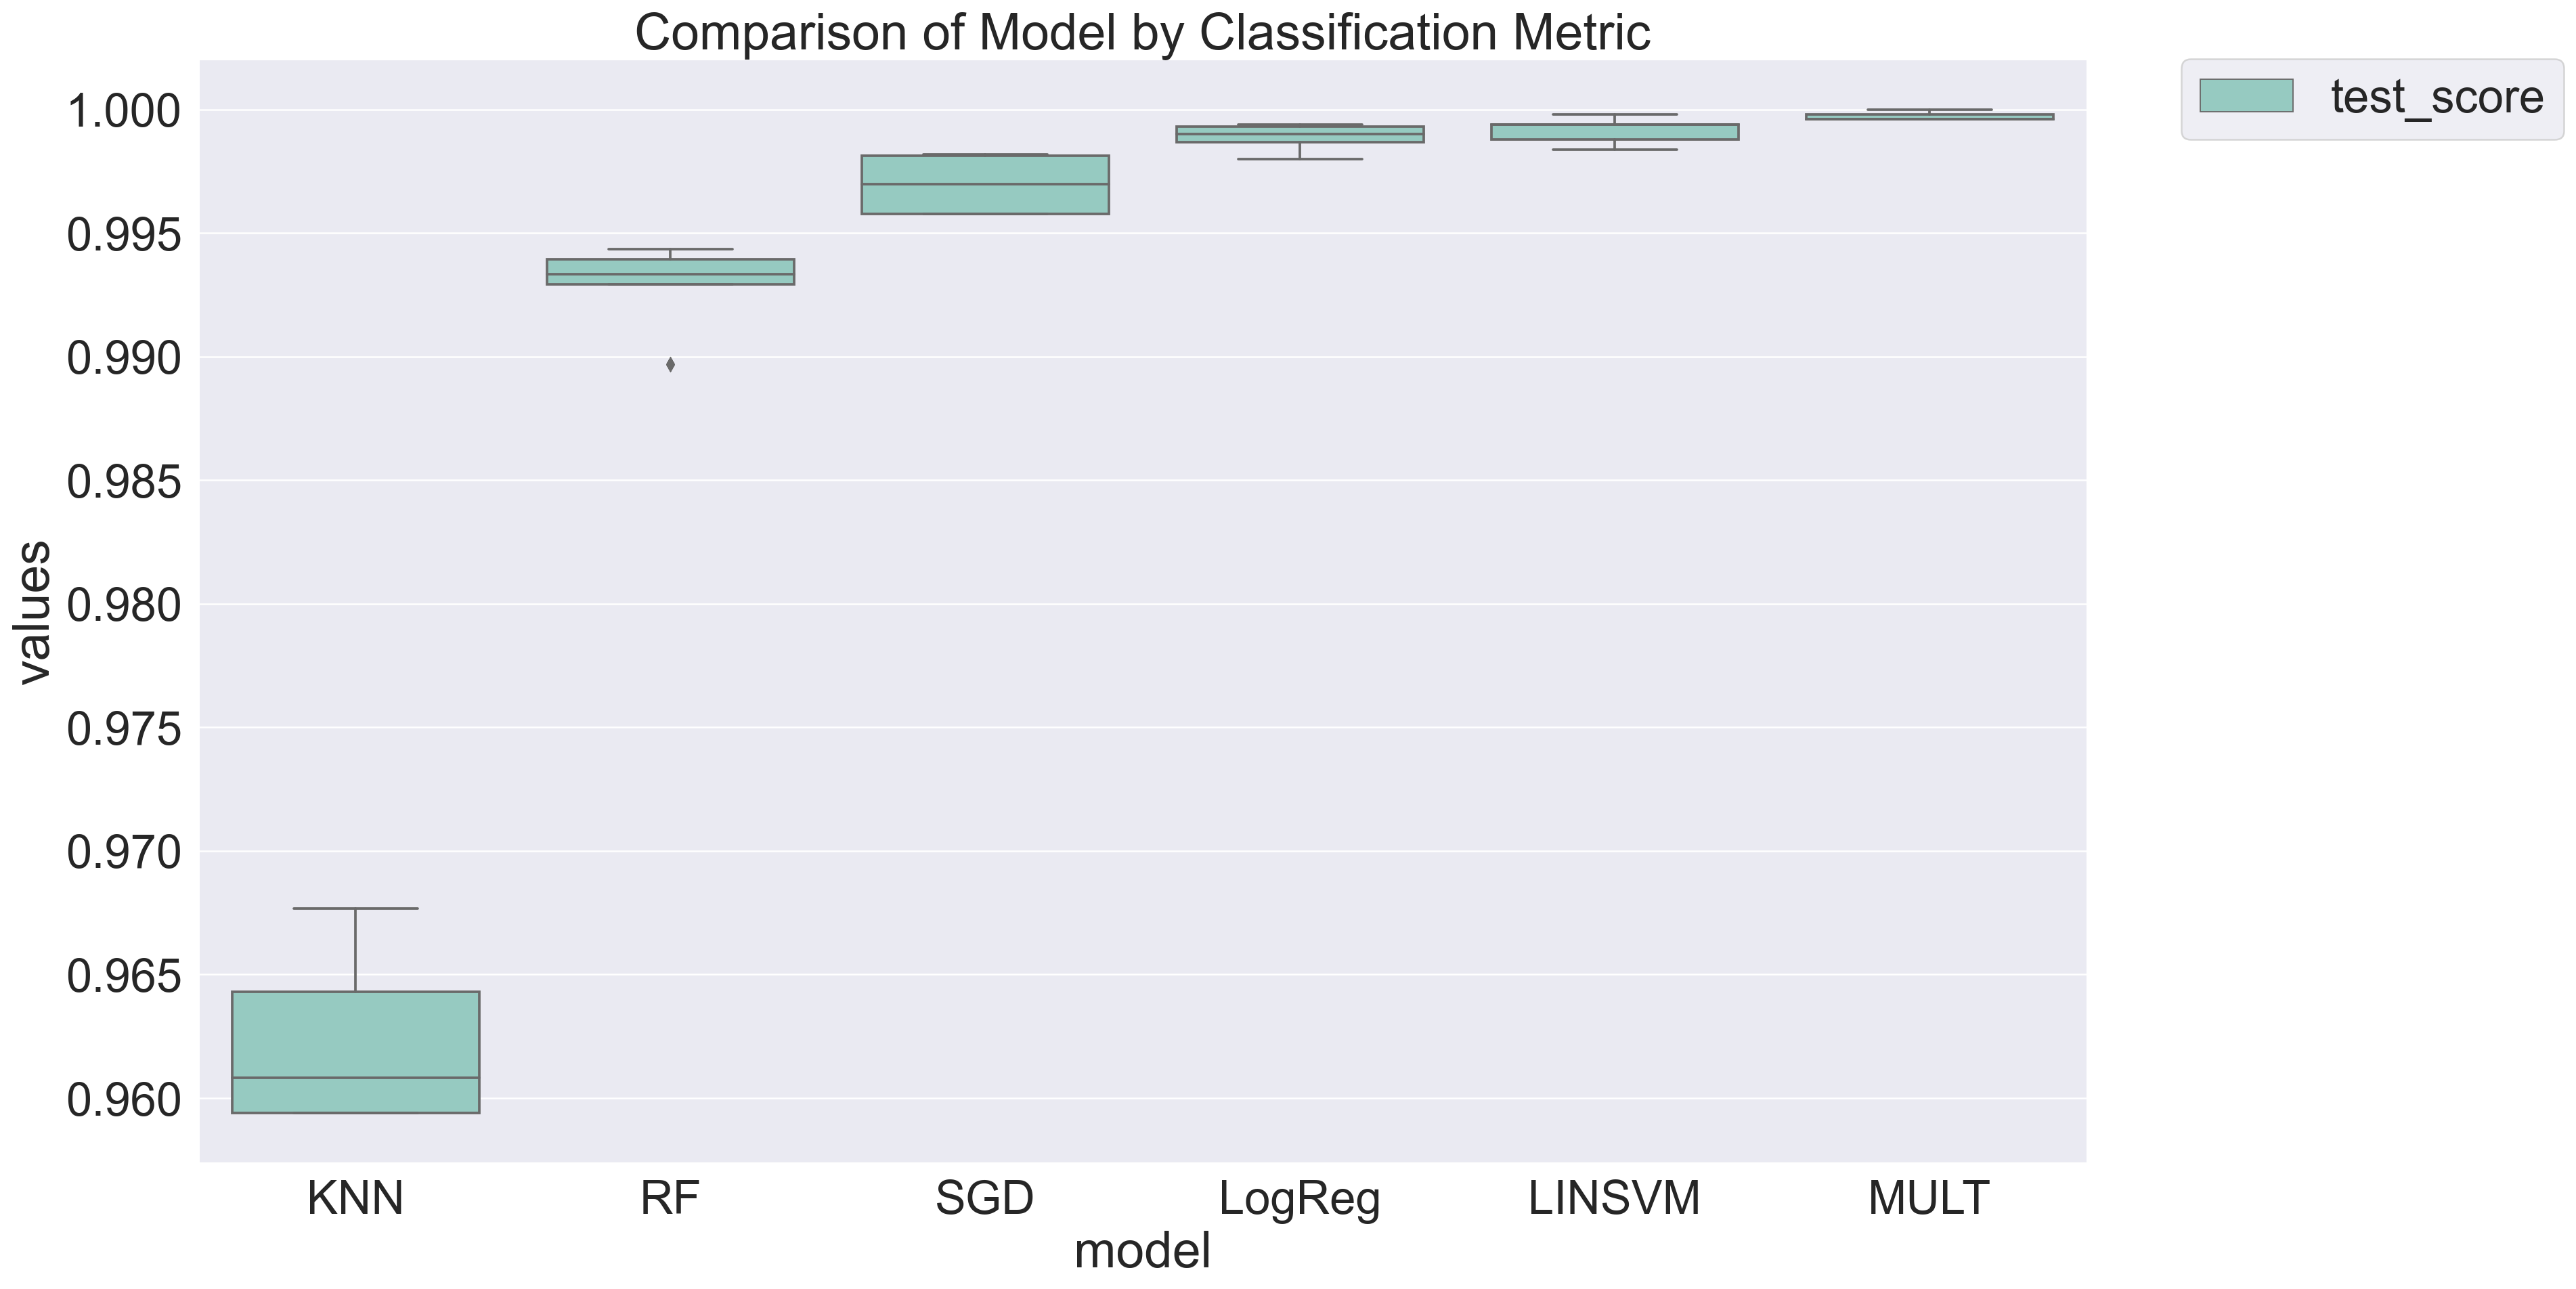

In [51]:
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=mod_perf(modelled)[0], palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
plt.savefig('./benchmark_models_performance.png',dpi=300)

The above Visual shows that the Multinomial Naive Bayes is the best model for Language identification with a flat box plot on 1.000 

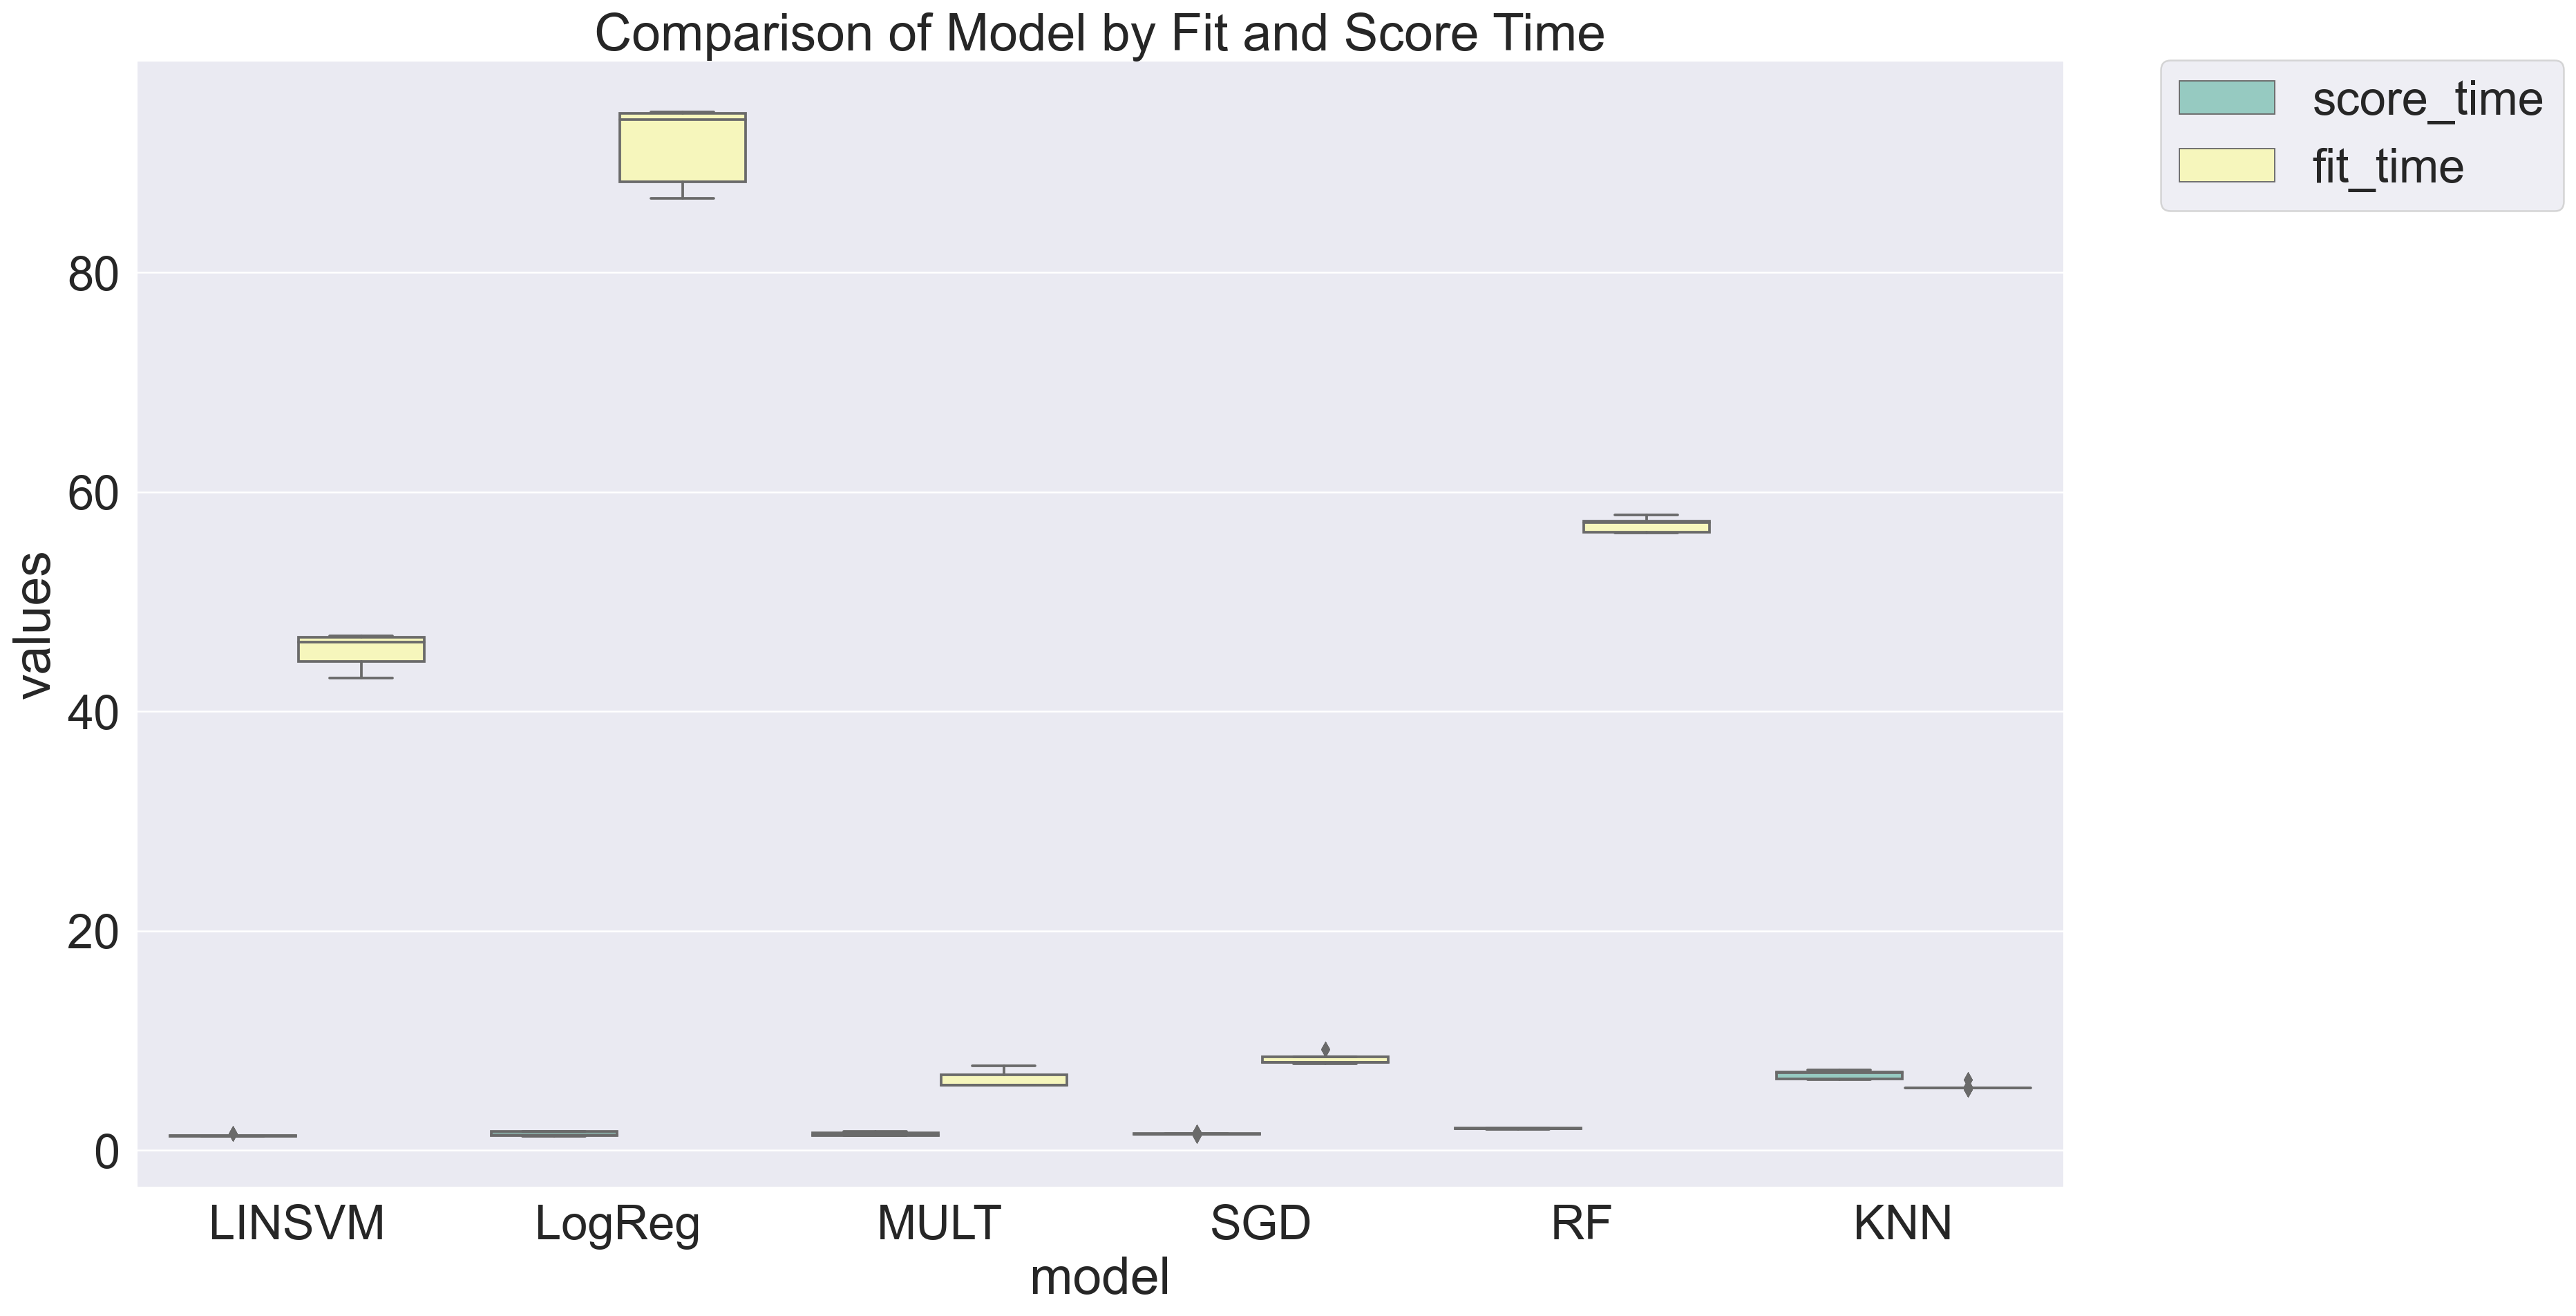

In [52]:
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=mod_perf(modelled)[1], palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Fit and Score Time')
plt.savefig('./benchmark_models_time.png',dpi=300)

This Visual shows the fit and score time for each model and we can see that the best model has a relatively low fit and score time which is good.

### Gridsearch Hyperparameter tuning

Fine tuning to improve the best model

In [73]:
# pipeline containing the best model and a countvectorizer
pipeline = Pipeline([
           ('vect', CountVectorizer()),
           ('clf', MultinomialNB(alpha=1)),
])
parameters = {
    'vect__ngram_range': ((5, 5), (6,6), (7, 7)),
    "vect__analyzer": ('char' , 'word')
}
gs = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)
gs.fit(X_train, y_train)
gs.best_estimator_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


Pipeline(steps=[('vect', CountVectorizer(analyzer='char', ngram_range=(6, 6))),
                ('clf', MultinomialNB(alpha=1))])

In [74]:
y_pred = gs.best_estimator_.predict(X_test)
f1 = f1_score(y_test, y_pred, average= 'weighted')


In [75]:
f1

0.9997575763958966

<a id="seven"></a>
## 7. Conclusion
<a href=#cont>Back to Table of Contents</a>


From the Visual metrics above, it is quite clear that the 'Naive Bayes' model outperforms the other models.

While the 'Naive Bayes', 'Linear Support vector Machine', and 'Logistic Regression' models recorded very similar F1-train and F1-test scores (with 'Naive Bayes' slighlty outperfoming the other two'), the 'Naive Bayes' model has a considerably lower training time than the 'Linear SVM' and the'Logistic Regression'.

Similarly to the above mentioned metrics, the accuracy and f1 score of the 'Naive Bayes' model once again outperforms the other models.

The n_gram(5,5) used was due to the hyper-parameter tuning of the models and it makes sense because it allows the model to read through entire sentences instead of seperate words as many languages can have similar words and most languages are also written using the English alphabets, so using the specified n_grams optimizes the model process.

The performance of our chosen model is already more than acceptable. However, should we look to further improve the performance of this model going forward, there is an option to perform further Hyper-parameter tuning on this chosen models.

### Submission


In [63]:
test['cleaned'] = test['text'].apply(clean) # applying the preprocessing function on the dataset
test

,index,text,cleaned
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele...",mmasepala fa maemo a a kgethegileng a letlelel...
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...,uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.,tshivhumbeo tshi fana na ngano dza vhathu
3,4,Kube inja nelikati betingevakala kutsi titsini...,kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.,winste op buitelandse valuta
...,...,...,...
5677,5678,You mark your ballot in private.,you mark your ballot in private
5678,5679,Ge o ka kgetha ka bowena go se šomiše Mofani k...,ge o ka kgetha ka bowena go se šomiše mofani k...
5679,5680,"E Ka kopo etsa kgetho ya hao ka hloko, hobane ...",e ka kopo etsa kgetho ya hao ka hloko hobane h...
5680,5681,"TB ke bokudi ba PMB, mme Morero o tla lefella ...",tb ke bokudi ba pmb mme morero o tla lefella t...


In [71]:
# Save Test Target variable predictions as CSV for upload to Kaggle.
submission_df = pd.DataFrame(test['index'])
submission_df['lang_id'] =  gs.best_estimator_.predict(test['cleaned'])

In [72]:
submission_df.to_csv('submission_7.csv', index=False)